In [1]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate


In [6]:
DATA_PATH_NT = "./data/features/fluxFromMagOversample"
DATA_PATH_T = "./data/features/fixedOversampled"


In [8]:
diego_t_test = pd.read_pickle(DATA_PATH_T+"/Ttest.pickle")
diego_t_train = pd.read_pickle(DATA_PATH_T+"/Ttrain.pickle")
diego_nt = pd.read_pickle(DATA_PATH_NT+"/NT.pickle")

In [9]:
def createBinClass(df):
    df['bin_class'] = df['Class']=="SN"
    df["fact_Class"] = pd.factorize(df['bin_class'])[0]

In [10]:
# diego_t['bin_class'] = diego_t['Class']=="SN"
# diego_t["fact_Class"] = pd.factorize(diego_t['bin_class'])[0]
# diego_nt['bin_class'] = diego_nt['Class']=="SN"
# diego_nt["fact_Class"] = pd.factorize(diego_nt['bin_class'])[0]
createBinClass(diego_nt)
createBinClass(diego_t_train)
createBinClass(diego_t_test)

In [13]:
diego_t_train.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1109211120074116827,0,Blazar,210,7.172527e-18,0.023810,0.082745,0.163277,0.243656,0.357815,0.506161,0,...,-6.380424e-26,-1.460659e-28,2.881289e-32,0,-3.043548,1.006218e-18,6.433194,0.516595,False,0
TranID1303231520434129450,0,HPM,38,7.074969e-17,0.394737,0.056171,0.137395,0.206649,0.353441,0.691391,0,...,2.273280e-22,8.676291e-25,-7.432468e-28,0,-3.259524,2.977006e-17,0.552256,0.371362,False,0
TranID1406061320624120923,0,SN,214,2.171602e-16,0.219626,0.104990,0.210532,0.338337,0.465419,0.704337,0,...,1.139319e-23,-1.994027e-26,1.207772e-29,0,-3.042721,5.707475e-17,0.296954,0.442943,True,1
TranID1110211321074152444,0,CV,251,2.801807e-17,0.127490,0.125948,0.212846,0.296347,0.462458,0.698255,0,...,3.410133e-24,-1.632573e-27,-1.445264e-30,0,-3.036339,5.534651e-18,5.401905,0.310460,False,0
TranID1110181320174103285,0,YSO,182,1.833842e-18,0.346154,0.126076,0.213152,0.395421,0.585475,0.764825,0,...,-6.639562e-26,-9.446326e-28,-3.396044e-31,0,-3.050372,7.155837e-19,27.930486,0.340082,False,0


In [14]:
diego_nt.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,bin_class,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
CataID1121048016765,0,non-transient,37,2.333440e-20,0.081081,0.085689,0.139318,0.186693,0.273474,0.379936,0,...,-1.227713e-27,-6.351738e-30,-2.764374e-33,0,-3.267227,8.182450e-21,0.961691,0.413107,False,0
CataID1121048016959,0,non-transient,162,7.375637e-20,0.117284,0.121476,0.216808,0.321775,0.543173,0.720385,0,...,3.435789e-27,5.131534e-31,-2.966116e-33,0,-3.056722,1.718766e-20,1.165157,0.638360,False,0
CataID1112021056668,0,non-transient,25,8.243111e-20,0.120000,0.074063,0.118072,0.167083,0.239397,0.649333,0,...,-1.019394e-25,-3.455726e-30,8.090981e-32,0,-3.415020,4.244134e-20,1.720962,0.687566,False,0
CataID1112021056680,0,non-transient,342,1.607906e-18,0.318713,0.089792,0.222260,0.329158,0.509584,0.750055,0,...,-1.461579e-25,-6.128517e-29,1.091448e-31,0,-3.026575,4.551548e-19,0.182665,0.501163,False,0
CataID1112021056719,0,non-transient,368,1.262493e-17,0.271739,0.131166,0.262401,0.393776,0.525359,0.789431,0,...,1.956175e-24,-1.700624e-28,-9.859054e-31,0,-3.024680,2.825978e-18,0.064208,0.768530,False,0


## Shuffle the data

In [15]:
diego_t_train = diego_t_train.sample(frac=1)
diego_t_test = diego_t_test.sample(frac=1)
diego_nt = diego_nt.sample(frac=1)

# SN within transients and non-transients

In [16]:
nt_train, nt_test= train_test_split(diego_nt,test_size = 0.25)

In [18]:
all_train = pd.concat([diego_t_train,nt_train])
all_test = pd.concat([diego_t_test,nt_test])

In [19]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [20]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [21]:
print(len(y_train))
print(len(y_test))

55603
36722


# Train the algorithm

In [22]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [23]:
clf.score(all_test[features],y_test)

0.7650182451936169

In [24]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,26046,5829
1,2800,2047


Text(0,0.5,'precision')

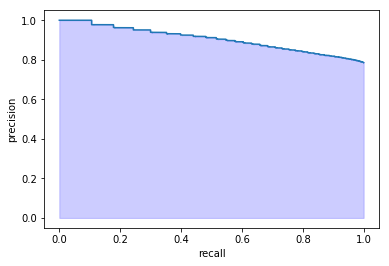

In [25]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')

In [26]:
integrate.trapz(precision[::-1],recall[::-1])

0.9017858373324066

In [27]:

f1_score(np.array(preds),np.array(y_test))

0.321779454531164

# SN within transients

In [29]:

all_train = diego_t_train
all_test = diego_t_test



In [30]:
all_train = all_train.sample(frac=1)
all_test = all_test.sample(frac=1)

In [31]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [32]:
print(len(y_train))
print(len(y_test))


44209
32923


In [33]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [34]:
clf.score(all_test[features],y_test)

0.7243264587066792

In [35]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,21191,5220
1,3856,2656


Text(0,0.5,'precision')

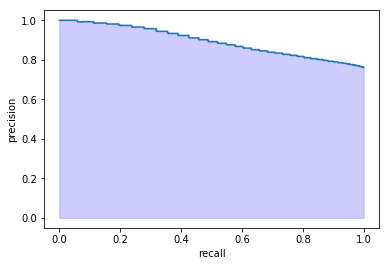

In [36]:
# plt.style.use(['dark_background'])
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')

In [37]:
integrate.trapz(precision[::-1],recall[::-1])

0.8908228415790352

In [38]:
f1_score(np.array(preds),np.array(y_test))

0.36919655268279117